In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/Users/nidhi.anil/Downloads/Wine_clust .csv')

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.shape

(178, 13)

In [6]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
data.duplicated().sum()

0

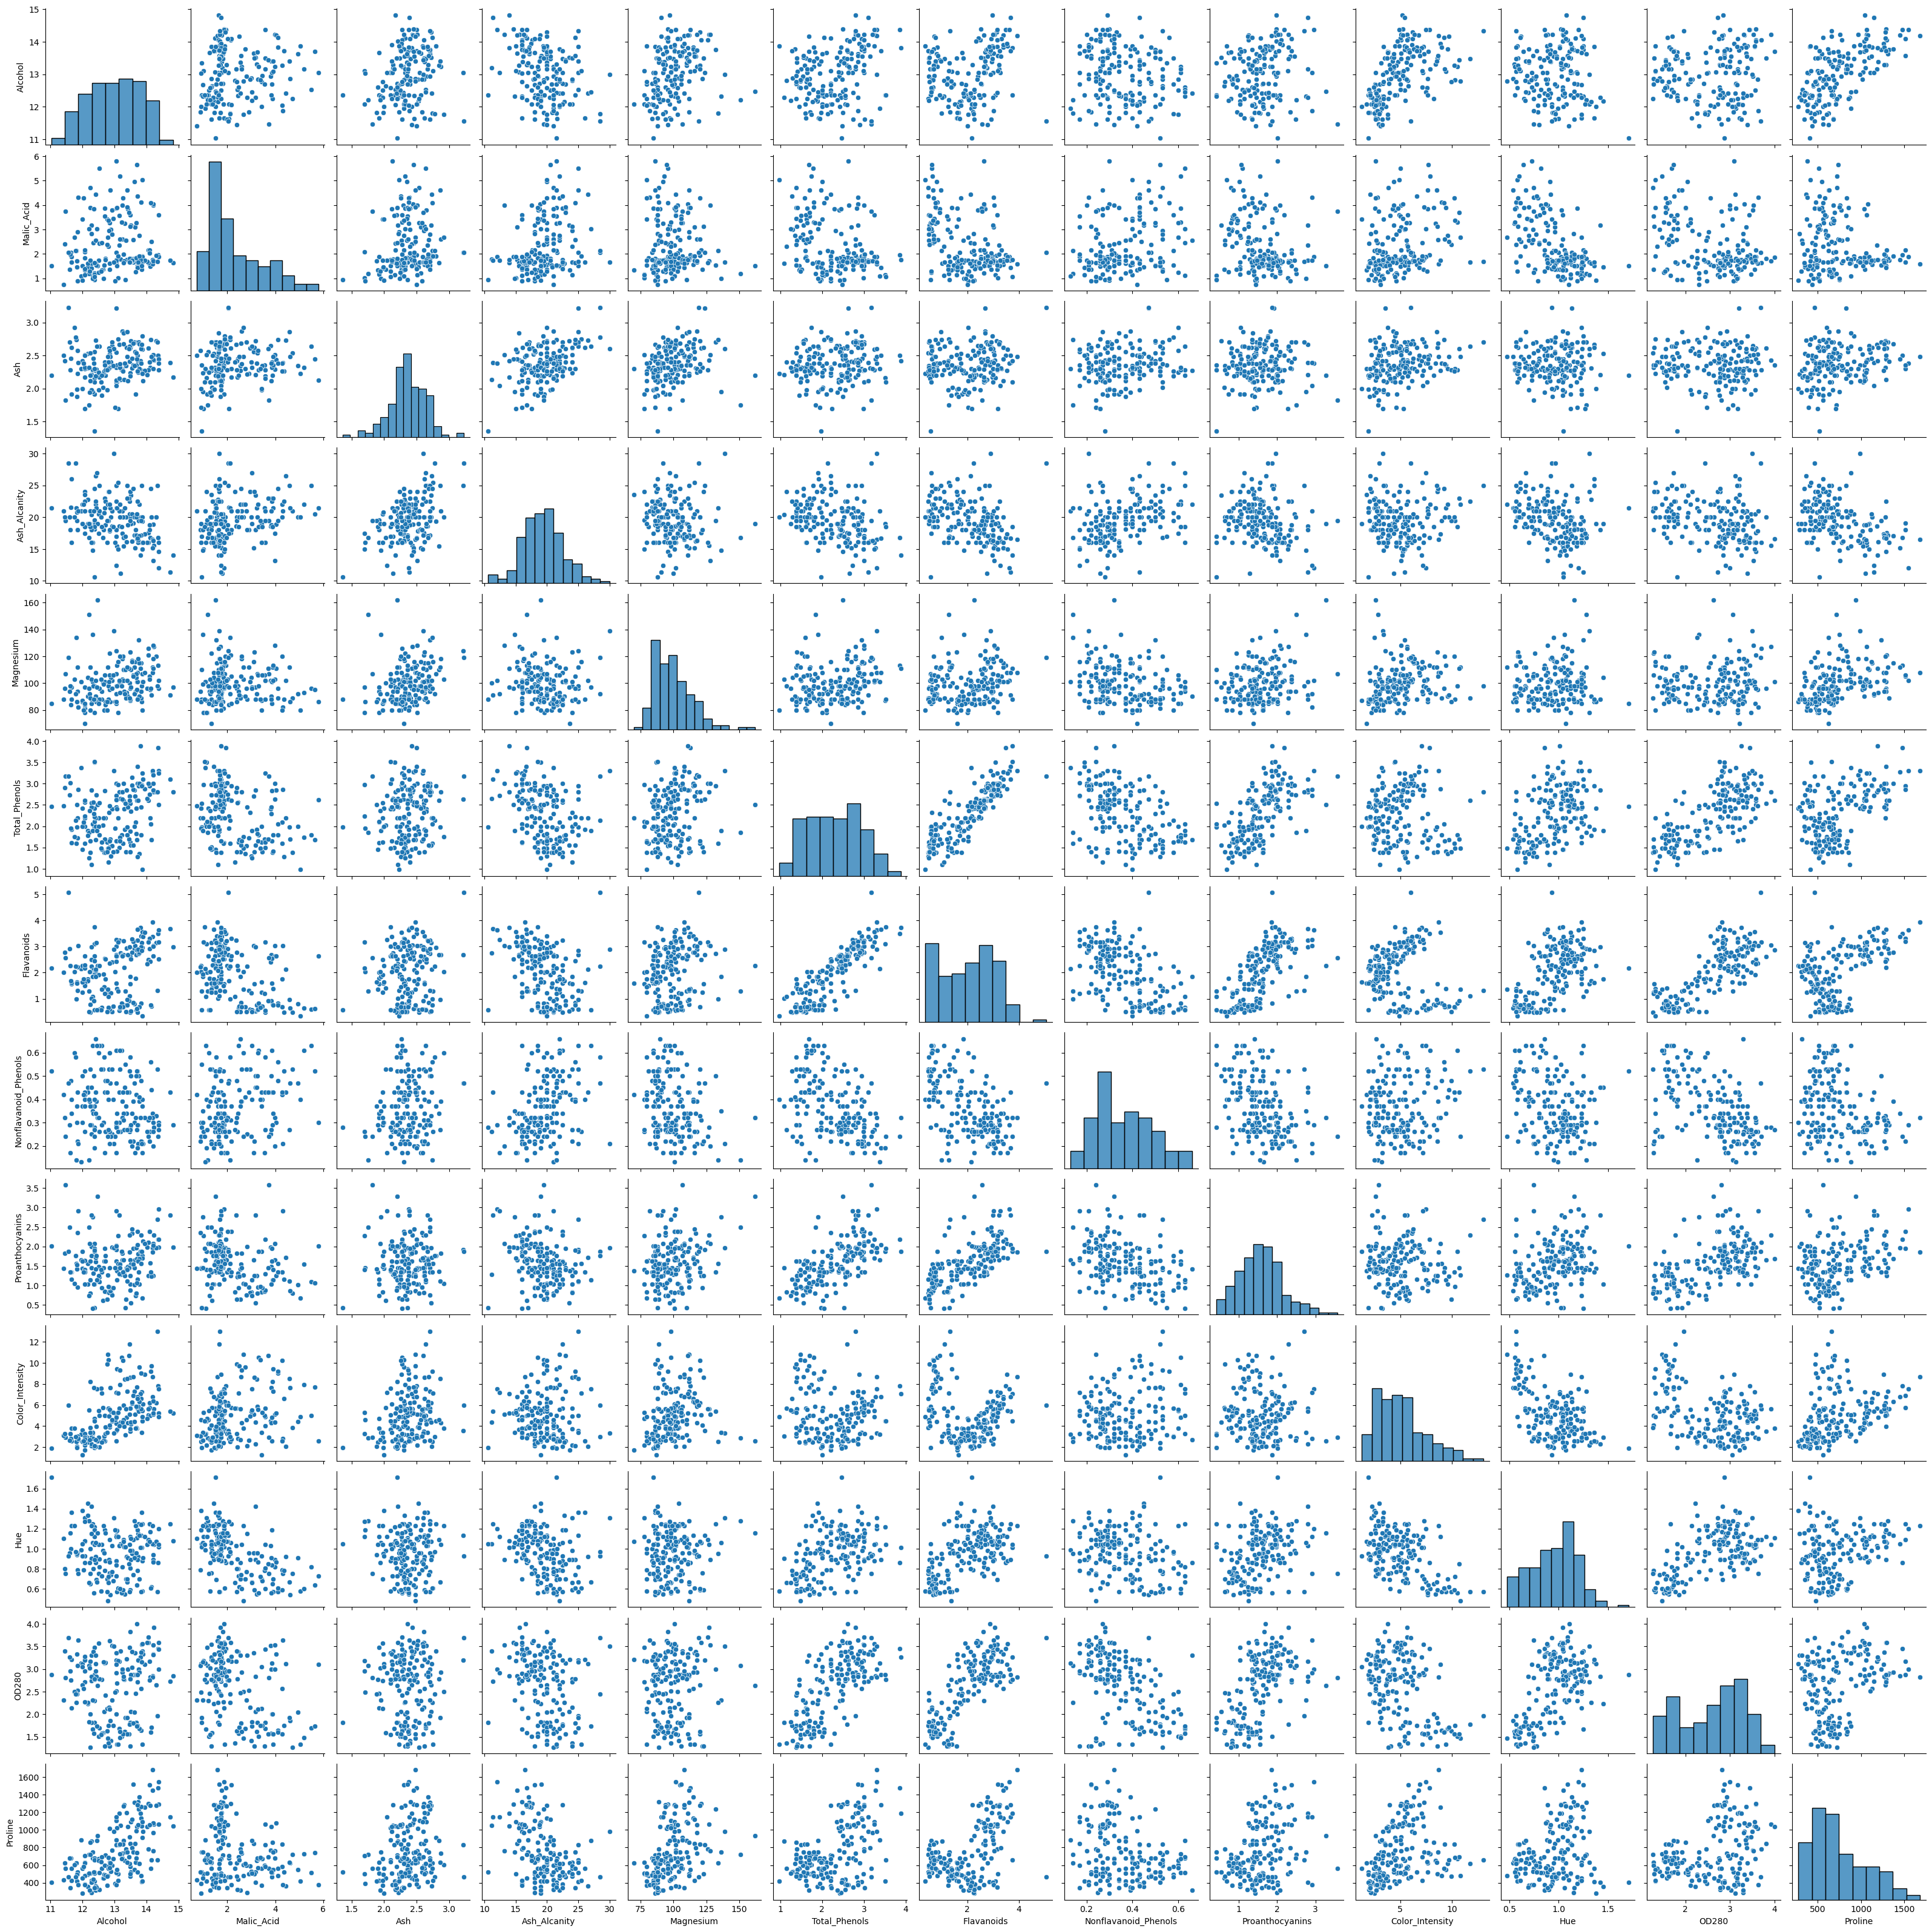

In [9]:
sns.pairplot(data)

<Axes: >

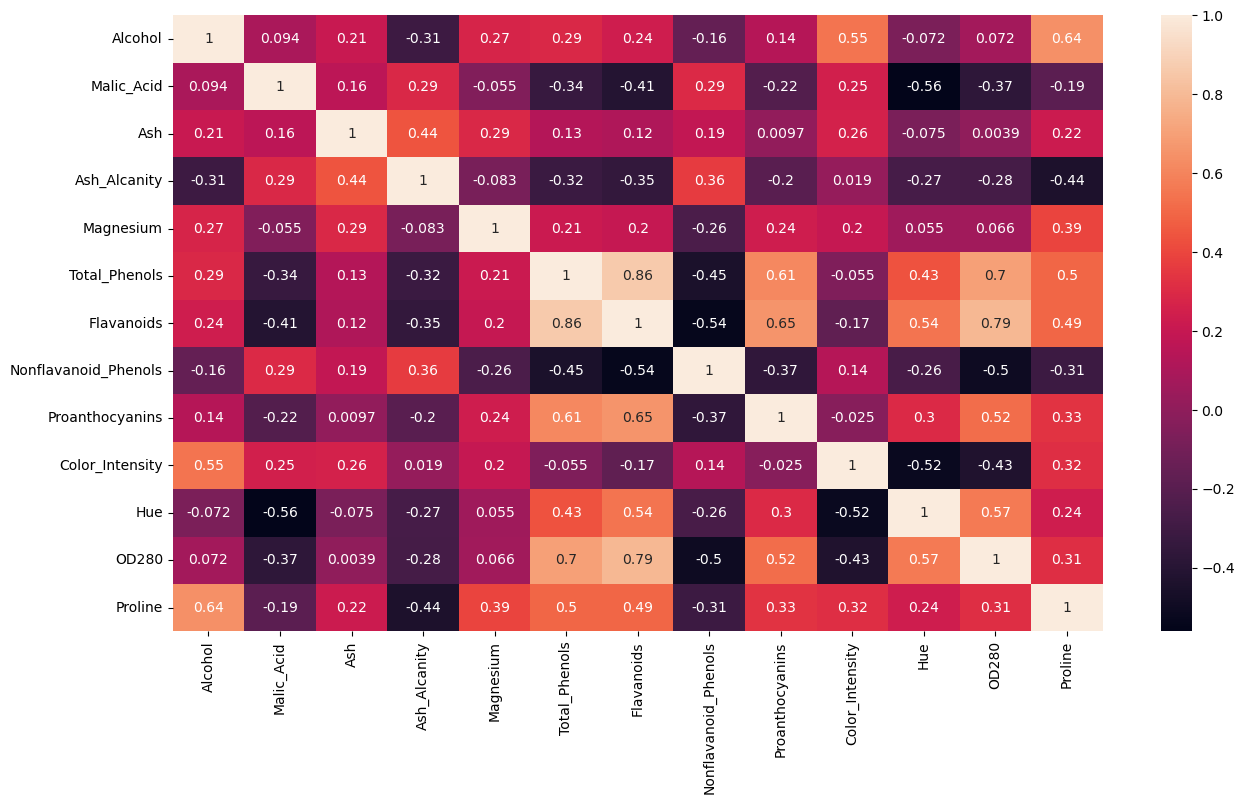

In [10]:
plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

# Finding null values

In [11]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# Handling Outliers

In [13]:
data.columns


Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

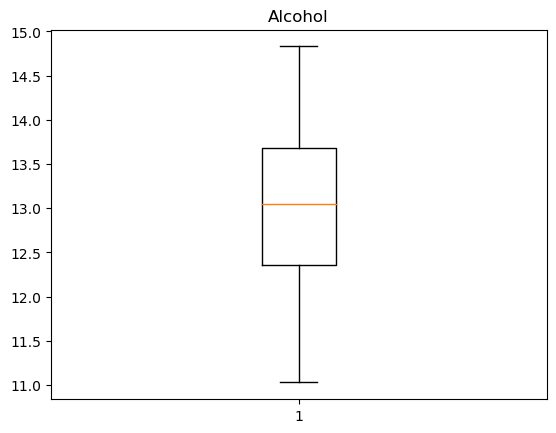

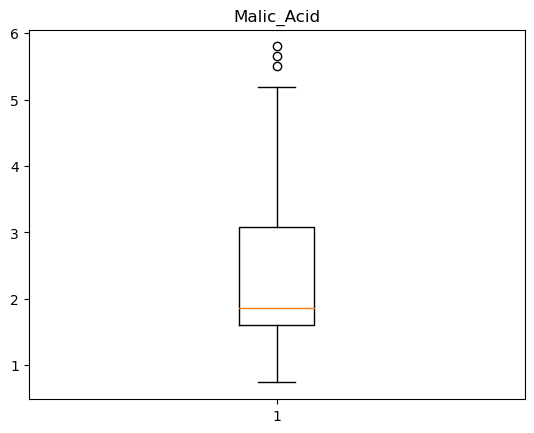

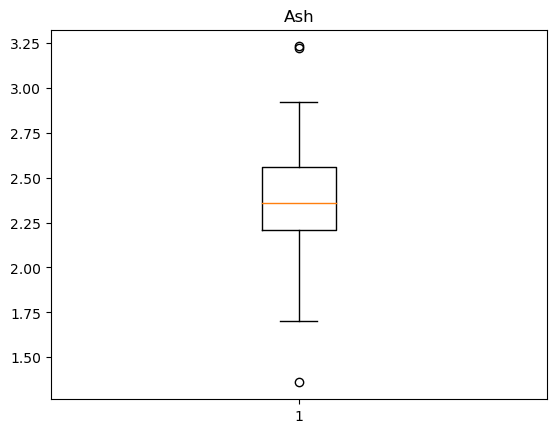

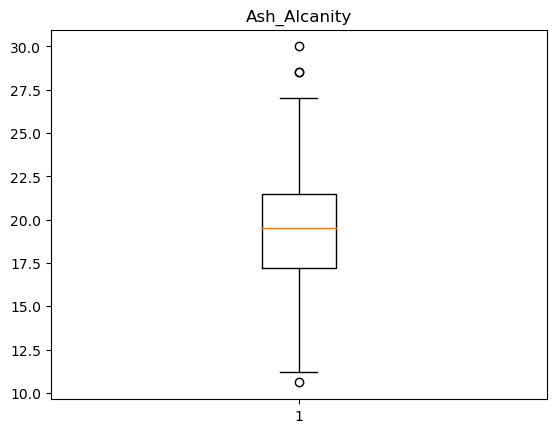

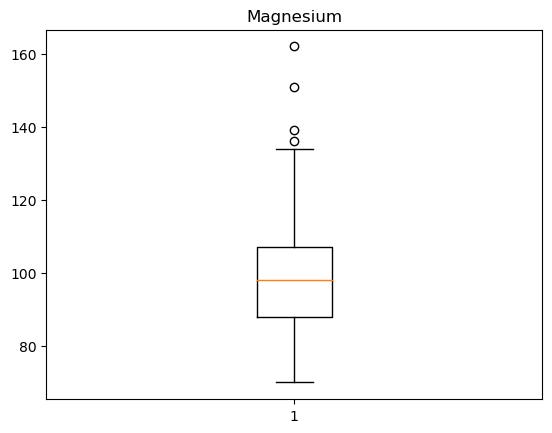

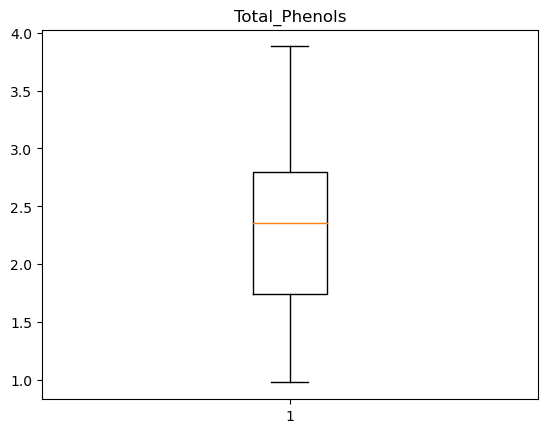

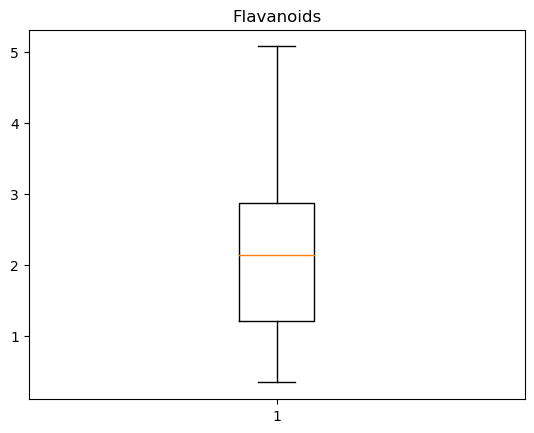

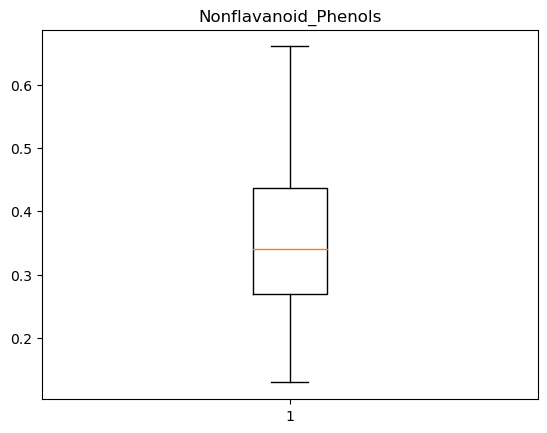

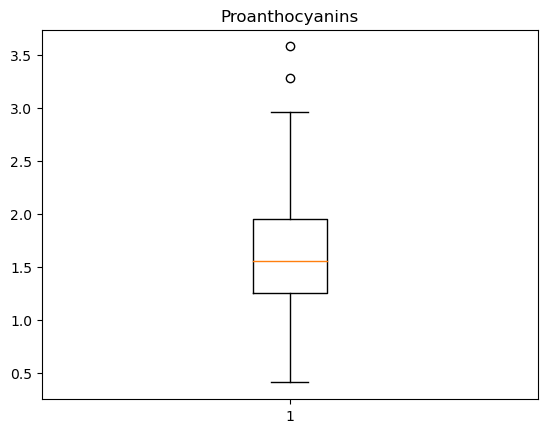

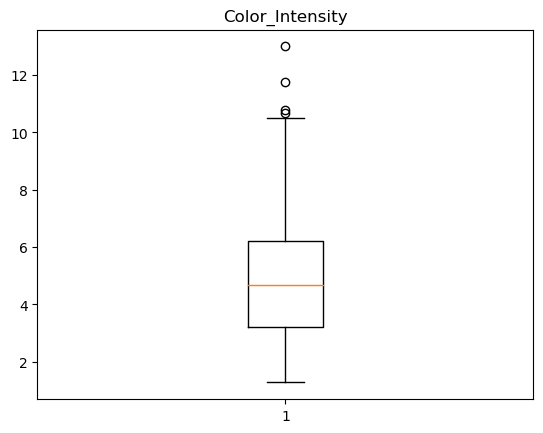

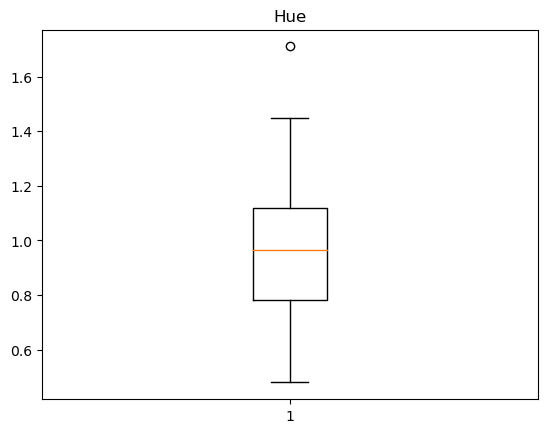

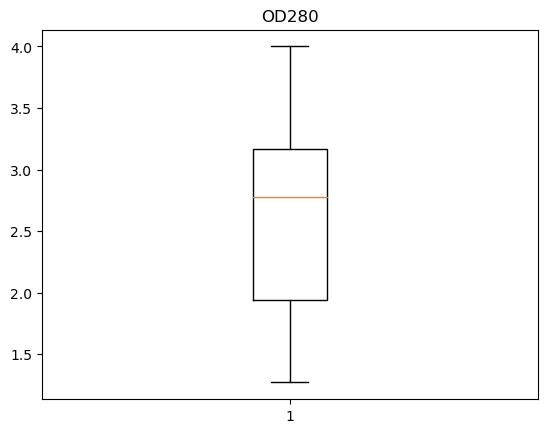

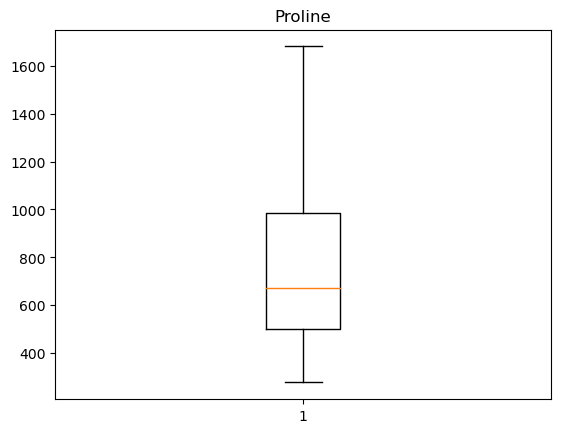

In [14]:
col = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
for i in col:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

Outlier handling of 'Malic acid' column

In [15]:
Q1_malic = data['Malic_Acid'].quantile(0.25)
Q2_malic = data['Malic_Acid'].quantile(0.50)
Q3_malic = data['Malic_Acid'].quantile(0.75)

print('Q1= ',Q1_malic)
print('Q2= ',Q2_malic)
print('Q3= ',Q3_malic)

IQR_malic = Q3_malic-Q1_malic
print('IQR= ',IQR_malic)

up_lim_malic = Q3_malic+1.5*IQR_malic
low_lim_malic = Q1_malic-1.5*IQR_malic

print('Upper limit= ',up_lim_malic)
print('Lower limit= ',low_lim_malic)

outlier_malic = []
for i in data['Malic_Acid']:
    if (i>up_lim_malic) or (i<low_lim_malic):
        outlier_malic.append(i)

print('Outlier= ',outlier_malic)

Q1=  1.6025
Q2=  1.8650000000000002
Q3=  3.0825
IQR=  1.48
Upper limit=  5.3025
Lower limit=  -0.6174999999999997
Outlier=  [5.8, 5.51, 5.65]


In [16]:
data['Malic_Acid'] = np.where(data['Malic_Acid']>up_lim_malic,up_lim_malic,
                              np.where(data['Malic_Acid']<low_lim_malic,low_lim_malic,data['Malic_Acid']))


Boxplot after outlier handling of 'Malic acid' column

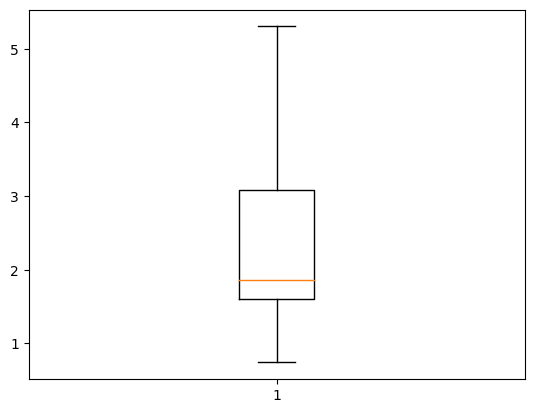

In [17]:
plt.boxplot(data['Malic_Acid'])
plt.show()

Outlier handling of 'Ash' column

In [18]:
Q1_Ash = data['Ash'].quantile(0.25)
Q2_Ash = data['Ash'].quantile(0.50)
Q3_Ash = data['Ash'].quantile(0.75)

print('Q1= ',Q1_Ash)
print('Q2= ',Q2_Ash)
print('Q3= ',Q3_Ash)

IQR_Ash = Q3_Ash-Q1_Ash
print('IQR= ',IQR_Ash)

up_lim_Ash = Q3_Ash+1.5*IQR_Ash
low_lim_Ash = Q1_Ash-1.5*IQR_Ash

print('Upper limit= ',up_lim_Ash)
print('Lower limit= ',low_lim_Ash)

outlier_Ash = []
for i in data['Ash']:
    if (i>up_lim_Ash) or (i<low_lim_Ash):
        outlier_Ash.append(i)

print('Outlier= ',outlier_Ash)

Q1=  2.21
Q2=  2.36
Q3=  2.5575
IQR=  0.34750000000000014
Upper limit=  3.0787500000000003
Lower limit=  1.6887499999999998
Outlier=  [3.22, 1.36, 3.23]


In [19]:
data['Ash'] = np.where(data['Ash']>up_lim_Ash,up_lim_Ash,
                              np.where(data['Ash']<low_lim_Ash,low_lim_Ash,data['Ash']))


Outlier handling of 'Ash_Alcanity' column

In [21]:
Q1_alc = data['Ash_Alcanity'].quantile(0.25)
Q2_alc = data['Ash_Alcanity'].quantile(0.50)
Q3_alc = data['Ash_Alcanity'].quantile(0.75)

print('Q1= ',Q1_alc)
print('Q2= ',Q2_alc)
print('Q3= ',Q3_alc)

IQR_alc = Q3_alc-Q1_alc
print('IQR= ',IQR_alc)

up_lim_alc = Q3_alc+1.5*IQR_alc
low_lim_alc = Q1_alc-1.5*IQR_alc

print('Upper limit= ',up_lim_alc)
print('Lower limit= ',low_lim_alc)

outlier_alc= []
for i in data['Ash_Alcanity']:
    if (i>up_lim_alc) or (i<low_lim_alc):
        outlier_alc.append(i)

print('Outlier= ',outlier_alc)

Q1=  17.2
Q2=  19.5
Q3=  21.5
IQR=  4.300000000000001
Upper limit=  27.950000000000003
Lower limit=  10.749999999999998
Outlier=  [10.6, 30.0, 28.5, 28.5]


In [22]:
data['Ash_Alcanity'] = np.where(data['Ash_Alcanity']>up_lim_alc,up_lim_alc,
                              np.where(data['Ash_Alcanity']<low_lim_alc,low_lim_alc,data['Ash_Alcanity']))


In [23]:
Q1_Mag = data['Magnesium'].quantile(0.25)
Q2_Mag = data['Magnesium'].quantile(0.50)
Q3_Mag = data['Magnesium'].quantile(0.75)

print('Q1= ',Q1_Mag)
print('Q2= ',Q2_Mag)
print('Q3= ',Q3_Mag)

IQR_Mag = Q3_Mag-Q1_Mag
print('IQR= ',IQR_Mag)

up_lim_Mag = Q3_Mag+1.5*IQR_Mag
low_lim_Mag = Q1_Mag-1.5*IQR_Mag

print('Upper limit= ',up_lim_Mag)
print('Lower limit= ',low_lim_Mag)

outlier_Mag= []
for i in data['Magnesium']:
    if (i>up_lim_Mag) or (i<low_lim_Mag):
        outlier_Mag.append(i)

print('Outlier= ',outlier_Mag)

Q1=  88.0
Q2=  98.0
Q3=  107.0
IQR=  19.0
Upper limit=  135.5
Lower limit=  59.5
Outlier=  [151, 139, 136, 162]


In [24]:
data['Magnesium'] = np.where(data['Magnesium']>up_lim_Mag,up_lim_Mag,
                              np.where(data['Magnesium']<low_lim_Mag,low_lim_Mag,data['Magnesium']))

Outlier handling of 'Proanthocyanins' column

In [25]:
Q1_pro = data['Proanthocyanins'].quantile(0.25)
Q2_pro = data['Proanthocyanins'].quantile(0.50)
Q3_pro = data['Proanthocyanins'].quantile(0.75)

print('Q1= ',Q1_pro)
print('Q2= ',Q2_pro)
print('Q3= ',Q3_pro)

IQR_pro = Q3_pro-Q1_pro
print('IQR= ',IQR_pro)

up_lim_pro = Q3_pro+1.5*IQR_pro
low_lim_pro = Q1_pro-1.5*IQR_pro

print('Upper limit= ',up_lim_pro)
print('Lower limit= ',low_lim_pro)

outlier_pro= []
for i in data['Proanthocyanins']:
    if (i>up_lim_pro) or (i<low_lim_pro):
        outlier_pro.append(i)

print('Outlier= ',outlier_pro)

Q1=  1.25
Q2=  1.5550000000000002
Q3=  1.95
IQR=  0.7
Upper limit=  3.0
Lower limit=  0.20000000000000018
Outlier=  [3.28, 3.58]


In [26]:
data['Proanthocyanins'] = np.where(data['Proanthocyanins']>up_lim_pro,up_lim_pro,
                              np.where(data['Proanthocyanins']<low_lim_pro,low_lim_pro,data['Proanthocyanins']))


Outlier handling of 'Color_Intensity' column

In [27]:
Q1_color = data['Color_Intensity'].quantile(0.25)
Q2_color = data['Color_Intensity'].quantile(0.50)
Q3_color = data['Color_Intensity'].quantile(0.75)

print('Q1= ',Q1_color)
print('Q2= ',Q2_color)
print('Q3= ',Q3_color)

IQR_color = Q3_color-Q1_color
print('IQR= ',IQR_color)

up_lim_color = Q3_color+1.5*IQR_color
low_lim_color = Q1_color-1.5*IQR_color

print('Upper limit= ',up_lim_color)
print('Lower limit= ',low_lim_color)

outlier_color= []
for i in data['Color_Intensity']:
    if (i>up_lim_color) or (i<low_lim_color):
        outlier_color.append(i)

print('Outlier= ',outlier_color)


Q1=  3.2199999999999998
Q2=  4.6899999999999995
Q3=  6.2
IQR=  2.9800000000000004
Upper limit=  10.670000000000002
Lower limit=  -1.2500000000000009
Outlier=  [10.8, 13.0, 11.75, 10.68]


In [28]:
data['Color_Intensity'] = np.where(data['Color_Intensity']>up_lim_color,up_lim_color,
                              np.where(data['Color_Intensity']<low_lim_color,low_lim_color,data['Color_Intensity']))

In [29]:
#outlier handling of 'Hue' column

Q1_Hue = data['Hue'].quantile(0.25)
Q2_Hue = data['Hue'].quantile(0.50)
Q3_Hue = data['Hue'].quantile(0.75)

print('Q1= ',Q1_Hue)
print('Q2= ',Q2_Hue)
print('Q3= ',Q3_Hue)

IQR_Hue = Q3_Hue-Q1_Hue
print('IQR= ',IQR_Hue)

up_lim_Hue = Q3_Hue+1.5*IQR_Hue
low_lim_Hue = Q1_Hue-1.5*IQR_Hue

print('Upper limit= ',up_lim_Hue)
print('Lower limit= ',low_lim_Hue)

outlier_Hue= []
for i in data['Hue']:
    if (i>up_lim_Hue) or (i<low_lim_Hue):
        outlier_Hue.append(i)

print('Outlier= ',outlier_Hue)

Q1=  0.7825
Q2=  0.965
Q3=  1.12
IQR=  0.33750000000000013
Upper limit=  1.6262500000000002
Lower limit=  0.2762499999999998
Outlier=  [1.71]


In [30]:
data['Hue'] = np.where(data['Hue']>up_lim_Hue,up_lim_Hue,
                              np.where(data['Hue']<low_lim_Hue,low_lim_Hue,data['Hue']))

# Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data)
#values are stored as numpy array
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
#converted to DataFrame
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,2.395088e-16,-4.478315e-16,-3.592632e-16,-7.983626e-17,0.000000,-3.991813e-16,3.592632e-16,2.395088e-16,-4.989766e-17,-7.983626e-17,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.449701e+00,-2.578195e+00,-2.662213e+00,-2.204108e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.113014e+00,-1.666938e+00,-2.106273e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.635217e-01,-5.959788e-01,-6.948555e-01,-8.584597e-01,-0.885468,-8.275393e-01,-7.401412e-01,-6.038048e-01,-8.064445e-01,-7.704749e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.242499e-01,-2.555683e-02,6.682950e-03,-1.108774e-01,0.095960,1.061497e-01,-1.760948e-01,-5.581813e-02,-1.544213e-01,3.541993e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.855158e-01,7.254987e-01,6.167164e-01,5.619467e-01,0.808997,8.490851e-01,6.095413e-01,6.538695e-01,5.153441e-01,7.198786e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,2.709072e+00,2.707715e+00,2.584074e+00,2.692556e+00,2.539515,3.062832e+00,2.402403e+00,2.540381e+00,2.498027e+00,2.955409e+00,1.960915e+00,2.971473e+00


# K-means Clustering

In [32]:
X = scaled_data.values

/Users/nidhi.anil/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nidhi.anil/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nidhi.anil/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nidhi.anil/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


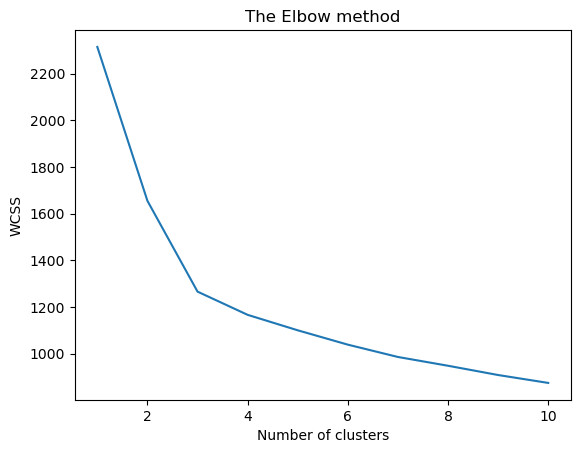

In [33]:
from sklearn.cluster import KMeans
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)


/Users/nidhi.anil/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
#For each cluster, there are values of cluster centers according to the 
#number of columns present in the data.
kmeans.cluster_centers_

array([[-0.92607185, -0.40170749, -0.49600866,  0.17655379, -0.52262273,
        -0.07598265,  0.02081257, -0.03353357,  0.05239714, -0.91596806,
         0.46119397,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30310701,  0.3607047 , -0.62745662,  0.59812007,
         0.88523736,  0.97781956, -0.56208965,  0.59562237,  0.18425304,
         0.47914286,  0.77924711,  1.12518529],
       [ 0.16490746,  0.88046317,  0.19366415,  0.53777086, -0.06103856,
        -0.97933029, -1.21524764,  0.72606354, -0.79087061,  0.94341639,
        -1.17028362, -1.29241163, -0.40708796]])

In [36]:
#Get the cluster labels for each sample
labels = kmeans.labels_
#Add a new column based on cluster labels
data['Cluster'] = labels

In [37]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [38]:
#checking the accuracy of the model

from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X,y_kmeans)
print('Silhouette Score of K-means Clustering:',sil_score)


Silhouette Score of K-means Clustering: 0.2854626783251893


# Apply Dimensionality Reduction Technique PCA

In [39]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,3.358147,-1.520222
1,2.229215,0.333261
2,2.540057,-1.036953
3,3.781124,-2.782566
4,1.016872,-0.955225


In [40]:
#Reducing the cluster centers using PCA.
centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

array([[-0.04575889,  1.79142856],
       [ 2.28971504, -0.94057269],
       [-2.725255  , -1.13975195]])

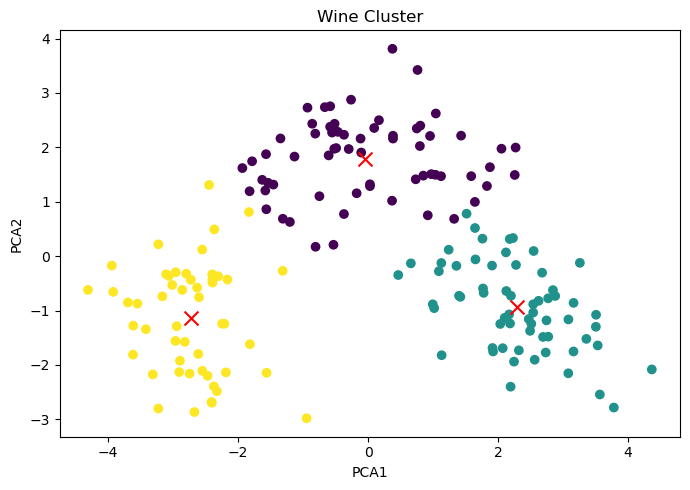

In [41]:
#Represent the cluster plot based on PCA1 and PCA2. 
#Differentiate clusters by passing a color parameter as c=kmeans.labels_

plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

# Agglomerative Clustering

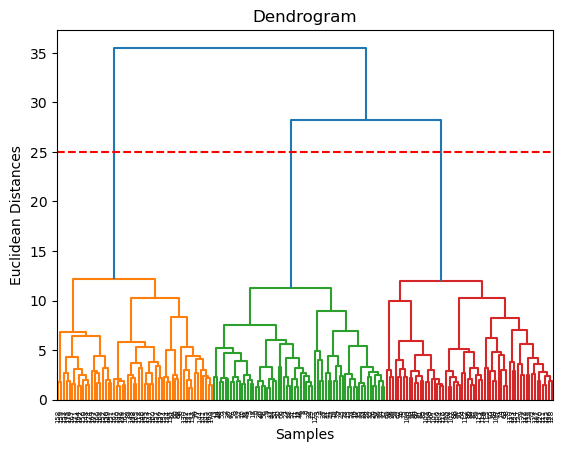

In [42]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distances')
plt.axhline(y=25,c='r',linestyle='--')
plt.show()

In [43]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/Users/nidhi.anil/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [44]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [45]:
#Silhouette score of agglomerative clustering
silhouette_avg1 = silhouette_score(X, y_hc)
print('Silhouette score of agglomerative clustering: ',silhouette_avg1)


Silhouette score of agglomerative clustering:  0.2786997668206731


# DBSCAN Clustering

In [47]:
df = pd.read_csv('/Users/nidhi.anil/Downloads/Wine_clust .csv')

In [48]:
#Scaling

scaled_df = scalar.fit_transform(df)
#values are stored as numpy array
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)
#converted to DataFrame
scaled_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [49]:
x = scaled_df.values

In [50]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=10) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

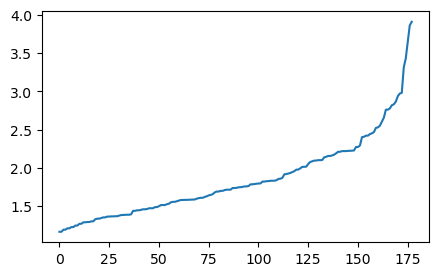

In [51]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot


In [52]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 2.5, min_samples = 8).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels


In [53]:
len(set(labels))

3

In [55]:
#Silhouette score of DBSCAN clustering

silhouette_score_db = silhouette_score(x,labels)
print('Silhouette score of DBSCAN clustering: ',silhouette_score_db)

Silhouette score of DBSCAN clustering:  0.2076088441129092


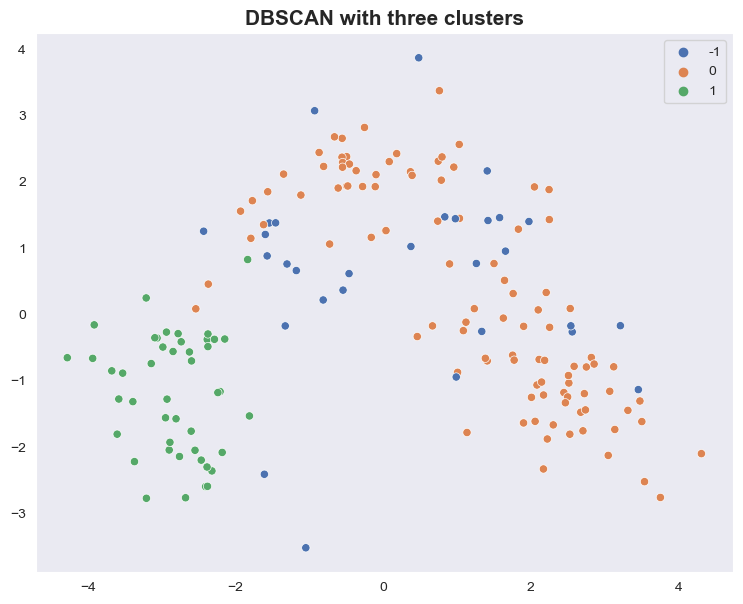

In [56]:
# Transform data to visualize data in 2d
from sklearn import decomposition
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
df_pca = pca.fit_transform(scaled_df)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=dbscan.labels_, x=df_pca[:,0], y=df_pca[:,1],palette="deep")
plt.title("DBSCAN with three clusters",fontsize=15,fontweight="bold")
plt.show()

Silhouette score is maximum for K-means clustering.